## Description ##
This notebook is dedicated to the **exploratory data analysis** of police traffic stops dataset. The dataset considers the CT state, it consists of records of stops, information on driver, and violation, the outcome of stop. Here such steps of analysis are considered:
- Importing and initial data preparation (checking data types, missing values, duplicates)
- Preliminary data exploration (asking basic questions about the data, grouping data)
- Data visualisation (building basic graphs such as bar chart, box plot, line plot, and histogram)

In [25]:
# Import the dataset, check the first rows and main information on variables in order to get acquainted with data

df = pd.read_csv('ct_statewide_2020_04_01.csv')
df.head()

/Users/anya/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14,15,16,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,raw_row_number,date,time,location,lat,lng,county_name,subject_age,subject_race,subject_sex,...,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_SubjectRaceCode,raw_SubjectEthnicityCode,raw_SearchAuthorizationCode
0,1121,2013-10-01,00:13:00,"GREENWOOD AVE/DURANT AVE, BETHEL",NaN,NaN,Fairfield County,50.0,asian/pacific islander,male,...,False,citation,NaN,False,False,NaN,Registration,A,N,N
1,762,2013-10-01,00:00:00,"GREENWOOD AVENUE, BETHEL",NaN,NaN,Fairfield County,34.0,white,male,...,False,citation,NaN,False,False,NaN,Cell Phone,W,N,N
2,520,2013-10-01,10:06:00,"GREENWOOD AVE/RECTOR ST, BETHEL",NaN,NaN,Fairfield County,74.0,white,male,...,True,warning,NaN,False,False,NaN,Registration,W,N,N
3,820,2013-10-01,18:04:00,"STONY HILL ROAD, BETHEL",NaN,NaN,Fairfield County,55.0,white,female,...,False,citation,NaN,False,False,NaN,Registration,W,N,N
4,521,2013-10-01,17:45:00,"STONY HILL ROAD, BETHEL",NaN,NaN,Fairfield County,55.0,white,male,...,False,citation,NaN,False,False,NaN,Registration,W,N,N


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175339 entries, 0 to 1175338
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   raw_row_number               1175339 non-null  object 
 1   date                         1175339 non-null  object 
 2   time                         1175339 non-null  object 
 3   location                     1175339 non-null  object 
 4   lat                          252338 non-null   float64
 5   lng                          252338 non-null   float64
 6   county_name                  1174853 non-null  object 
 7   subject_age                  1171300 non-null  float64
 8   subject_race                 1175339 non-null  object 
 9   subject_sex                  1175339 non-null  object 
 10  officer_id_hash              1045976 non-null  object 
 11  department_name              1175339 non-null  object 
 12  type                         1153900 non-n

The dataset represents the information on stops made by police for different kinds of violations. There is such data as drivers' age, sex and race, the place where he/she was stopped, the reason for stop, the outcome of the stop, and others.

Using this dataset we can analyze what violations and outcomes are the most frequent depending of driver's age, sex, race. 

However, there are some variables which will not take part in the analysis, such as latitude, longtitude, county_name, etc. That is why we create new dataframe without those columns. Also, there is a need to check for missing values and if necessary get rid of them

In [27]:
ct = df.drop(['raw_row_number',
         'lat', 
         'lng',
         'county_name',
         'contraband_found',
         'officer_id_hash',
         'search_basis',
         'violation',
         'raw_SubjectRaceCode',
         'raw_SubjectEthnicityCode',
         'raw_SearchAuthorizationCode'], axis = 1)
ct.head()

,date,time,location,subject_age,subject_race,subject_sex,department_name,type,arrest_made,citation_issued,warning_issued,outcome,search_conducted,search_vehicle,reason_for_stop
0,2013-10-01,00:13:00,"GREENWOOD AVE/DURANT AVE, BETHEL",50.0,asian/pacific islander,male,Bethel,vehicular,False,True,False,citation,False,False,Registration
1,2013-10-01,00:00:00,"GREENWOOD AVENUE, BETHEL",34.0,white,male,Bethel,vehicular,False,True,False,citation,False,False,Cell Phone
2,2013-10-01,10:06:00,"GREENWOOD AVE/RECTOR ST, BETHEL",74.0,white,male,Bethel,vehicular,False,False,True,warning,False,False,Registration
3,2013-10-01,18:04:00,"STONY HILL ROAD, BETHEL",55.0,white,female,Bethel,vehicular,False,True,False,citation,False,False,Registration
4,2013-10-01,17:45:00,"STONY HILL ROAD, BETHEL",55.0,white,male,Bethel,vehicular,False,True,False,citation,False,False,Registration


In [28]:
ct.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,1175339,731,2014-05-23,3171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,1175339,1440,00:00:00,19342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,1175339,406504,"SILAS DEANE HWY, Wethersfield",2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subject_age,1171300.0,NaN,NaN,NaN,38.456762,14.719562,10.0,26.0,36.0,49.0,109.0
subject_race,1175339,5,white,844295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subject_sex,1175339,2,male,746251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department_name,1175339,104,State Police,449364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,1153900,1,vehicular,1153900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrest_made,1175335,2,False,1150305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citation_issued,1175337,2,False,616540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# It seems that drivers' age has outliers, as it is very unlikely for a person to drive in 100 years.
# Let us suppose that the drivers' age should be no more than 85

ct.drop(ct[ct['subject_age'] > 85].index, axis = 0, inplace = True)

In [30]:
# Check for missing values in proportion to the whole dataset

ct.isna().sum()/ct.shape[0]

date                0.000000
time                0.000000
location            0.000000
subject_age         0.003442
subject_race        0.000000
subject_sex         0.000000
department_name     0.000000
type                0.018165
arrest_made         0.000003
citation_issued     0.000002
warning_issued      0.000002
outcome             0.015725
search_conducted    0.000000
search_vehicle      0.000000
reason_for_stop     0.495465
dtype: float64

In [31]:
# Remove missing values and duplicates

ct.dropna(subset = ['subject_age','type', 'outcome', 'arrest_made'], inplace = True)
ct.drop_duplicates(inplace = True)
ct.isna().sum()

date                     0
time                     0
location                 0
subject_age              0
subject_race             0
subject_sex              0
department_name          0
type                     0
arrest_made              0
citation_issued          0
warning_issued           0
outcome                  0
search_conducted         0
search_vehicle           0
reason_for_stop     558664
dtype: int64

In [32]:
# Check the data types and change some of them. 
# For example, there are variables representing race and sex, which can be eacily transformed to category type.

ct.dtypes

date                 object
time                 object
location             object
subject_age         float64
subject_race         object
subject_sex          object
department_name      object
type                 object
arrest_made          object
citation_issued      object
warning_issued       object
outcome              object
search_conducted       bool
search_vehicle         bool
reason_for_stop      object
dtype: object

In [33]:
# Change data formats

ct['subject_race'] = ct['subject_race'].astype('category')
ct['subject_sex'] = ct['subject_sex'].astype('category')
ct['outcome'] = ct['outcome'].astype('category')
ct['arrest_made'] = ct['arrest_made'].astype('bool')
ct['citation_issued'] = ct['citation_issued'].astype('bool')

In [34]:
# Combine date and time columns into one datetime column

date_time = ct['date'].str.cat(ct['time'], sep = ' ')
ct['datetime'] = pd.to_datetime(date_time)

## Data Exploration ##

**List of questions** we are interested in:

- What is the most common violation and what is the most common outcome?
- What is the most common outcome for Speeding violation?
- Drivers of which age are stopped more frequently?
- How types of outcomes are distributed, depending on sex and race?
- What is the average age of drivers in each group of outcomes? Depending on gender?

In [35]:
# The most common violation 

ct['reason_for_stop'].value_counts(normalize = True)

# The most common reasons to stop are connected with speeding, it corresponds to almost 27% of all stops

Speed Related                                             0.274041
Other                                                     0.148210
Registration                                              0.092910
Cell Phone                                                0.091638
Defective Lights                                          0.090629
                                                            ...   
Moving Violation|Other|Speed Related|Moving Violation     0.000002
Other|Other|Display of Plates|Registration                0.000002
Defective Lights|Registration|Moving Violation            0.000002
Stop Sign|Display of Plates|Other                         0.000002
Suspended License|Display of Plates|Other|Registration    0.000002
Name: reason_for_stop, Length: 302, dtype: float64

In [36]:
# The most common outcome

ct['outcome'].value_counts(normalize = True)

# The most common outcome is the citation, which makes up almost half of all cases.
# The second most common outcome is warning

citation    0.483118
warning     0.449677
summons     0.045737
arrest      0.021468
Name: outcome, dtype: float64

In [37]:
# What is the most common outcome for Speeding violation?

ct[ct['reason_for_stop'] == 'Speed Related']['outcome'].value_counts(normalize = True)

# As is observed the most frequent outcome of stop for Speeding is citation.

citation    0.535181
warning     0.431937
summons     0.023776
arrest      0.009106
Name: outcome, dtype: float64

In [41]:
# Drivers of which age are stopped more frequently?

ct['subject_age'].value_counts().head()

# There are mostly 25-year-old people who were stopped

25.0    38088
24.0    37971
23.0    37936
22.0    36377
21.0    33500
Name: subject_age, dtype: int64

In [39]:
# How types of outcomes are distributed, depending on sex?

ct.groupby(by = 'subject_sex')['outcome'].value_counts(normalize = True)

subject_sex  outcome 
female       citation    0.476948
             warning     0.471891
             summons     0.037271
             arrest      0.013890
male         citation    0.486692
             warning     0.436812
             summons     0.050640
             arrest      0.025856
Name: outcome, dtype: float64

In [42]:
# How types of outcomes are distributed, depending on race?

ct.groupby(by = 'subject_race')['outcome'].value_counts(normalize = True)

subject_race            outcome 
asian/pacific islander  citation    0.569699
                        warning     0.401431
                        summons     0.019116
                        arrest      0.009754
black                   citation    0.456033
                        warning     0.434682
                        summons     0.081179
                        arrest      0.028105
hispanic                citation    0.507729
                        warning     0.366691
                        summons     0.090031
                        arrest      0.035550
other                   citation    0.586400
                        warning     0.375840
                        summons     0.025760
                        arrest      0.012000
white                   citation    0.481200
                        warning     0.468301
                        summons     0.032309
                        arrest      0.018191
Name: outcome, dtype: float64

In [43]:
# The average age of stopped drivers by outcome

ct.groupby(by = 'outcome').subject_age.mean()

outcome
arrest      34.808336
citation    37.935934
summons     33.850909
warning     39.474308
Name: subject_age, dtype: float64

In [44]:
# The average age of stopped drivers by outcome, splitted by gender

pd.pivot_table(ct, values = 'subject_age', index = 'subject_sex', columns = 'outcome')

outcome,arrest,citation,summons,warning
subject_sex,,,,
female,35.261736,37.657099,33.718482,39.517320
male,34.667277,38.094184,33.907355,39.447398


## Data Visualisation ##

Let's visualize the following:
- The distribution of drivers' age by gender
- Hourly arrest rate
- The number of drivers by sex splitted by race
- The distribution of drivers' age depending on arrest made

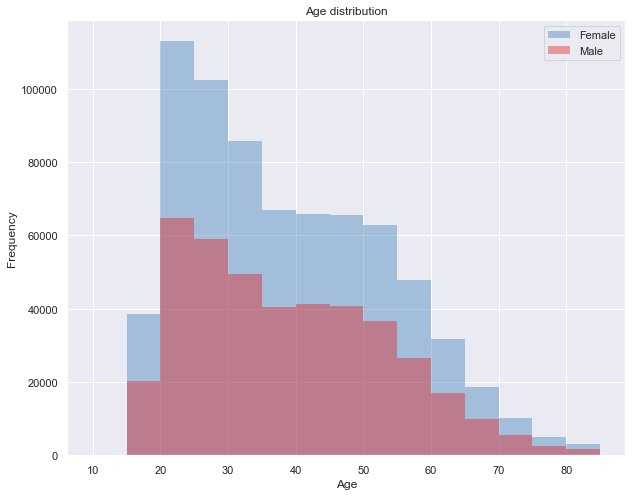

In [45]:
# The distribution of drivers' age by gender
sns.set(rc = {'figure.figsize':(10,8)})

fig, ax = plt.subplots()

ax = sns.histplot(x = 'subject_age', 
            data = ct,
            binwidth = 5,
            linewidth = 0,
            hue = 'subject_sex',
            alpha = 0.4,
            palette = 'Set1')

ax.set_title('Age distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(['Female', 'Male'])

plt.show()

# Here we see that the major part of both male and female drivers are of 25-30 years.
# The distribution has a right skew, which is explainable, as the drivers licence can be obtained only by 16+ individuals.

In [46]:
# Hourly arrests using line plot
ct.set_index('datetime', inplace = True)
hourly_arrest = ct.groupby(ct.index.hour)['arrest_made'].mean()

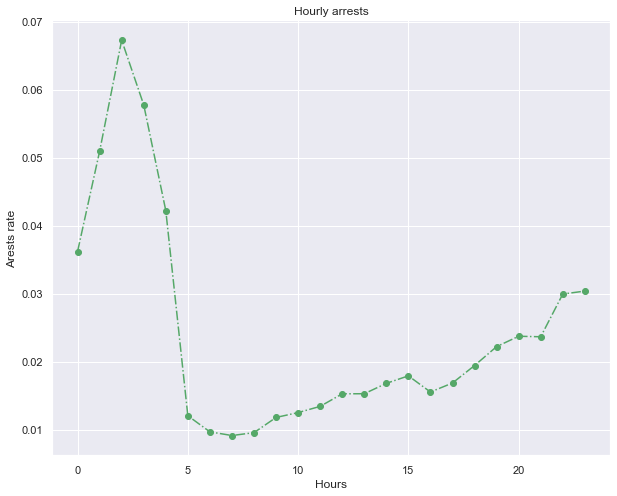

In [47]:
fig, ax = plt.subplots()
ax.plot(hourly_arrest, 
        linestyle = '-.',
        color = 'g',
        marker = 'o')

ax.set_title('Hourly arrests')
ax.set_xlabel('Hours')
ax.set_ylabel('Arests rate')
plt.show()

# In the nighttime the arrest rate is increased and reaches it peak, after that it drops (at 5 am) and slowly grows. 

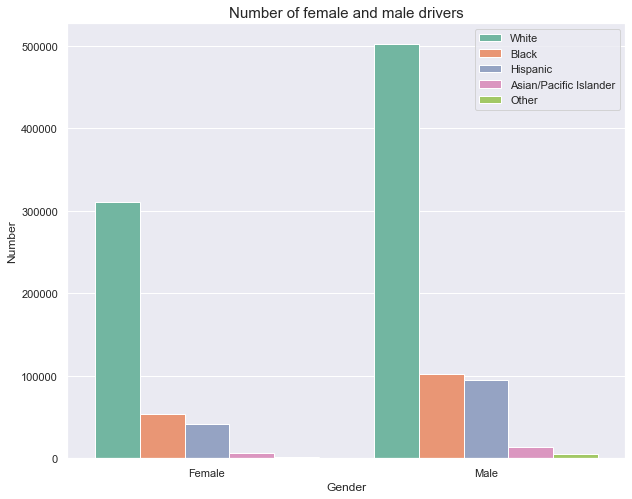

In [48]:
# The number of drivers by sex splitted by race
fig, ax = plt.subplots()

ax = sns.countplot(x = 'subject_sex', 
              data = ct,
              hue = 'subject_race',
              hue_order = ['white','black','hispanic','asian/pacific islander', 'other'],
              palette = 'Set2')

ax.set_title('Number of female and male drivers', fontsize = 15)
ax.set_xlabel('Gender', fontsize = 12)
ax.set_ylabel('Number', fontsize = 12)
ax.legend(['White', 'Black', 'Hispanic', 'Asian/Pacific Islander', 'Other'])
ax.set_xticklabels(['Female','Male'])
plt.show()

# In both groups the proportions of race is similar, the majority of stopped drivers were white.
# Less drivers were black or hispanic race.

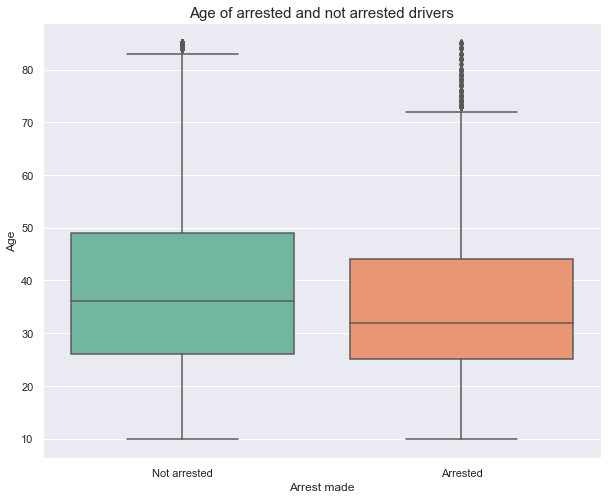

In [49]:
fig, ax = plt.subplots()

ax = sns.boxplot(x = 'arrest_made', 
            y = 'subject_age', 
            data = ct,
            palette = 'Set2')

ax.set_title("Age of arrested and not arrested drivers", fontsize = 15)
ax.set_xlabel('Arrest made', fontsize = 12)
ax.set_ylabel('Age', fontsize = 12)
ax.set_xticklabels(['Not arrested', 'Arrested'])
plt.show()

# In case of arrested drivers, their age is on average lower than of those not arrested as can be seen from median value.
# The upper quartile of arrested drivers' age is lower on average on 10 years than of those not arrested.